In [1]:
#import Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


#set twitter authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#colect targetterms and create lists to hold results for sentiment analysis and data frame
target_terms = ["@BBC", "@CBS","@CNN","@FoxNews", "@nytimes"]
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
outlet_account = []
tweettext = []
tweetdate = []

In [4]:
#Looping through all the terms
for term in target_terms:
    tweet_count = 0
    #Pulling tweets
    for x in range(5):
        public_tweets = api.user_timeline(term, page=x)

        #Looping through all tweets
        for tweet in public_tweets:
            tweet_count += 1
    
            #Appending results to list
            outlet_account.append(term)
            tweettext.append(tweet['text'])
            tweetdate.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            #Performing Vader Sentiment Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
            #Appending sentiment analysis to respective list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [5]:
#dictionary to hold dataframe elements
tweet_dict = { "Source": outlet_account,
              "Tweet": tweettext,
              "Date": tweetdate,
              "Compound Score": compound_list,
              "Positive Score": positive_list,
              "Neutral Score": neutral_list,
              "Negative Score": negative_list,
              "Tweets Ago": tweets_ago}


#tweet dataframe 
tweet_df = pd.DataFrame(tweet_dict)
tweet_df.head()

,Source,Tweet,Date,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
0,@BBC,The search for Lord Sugar's next business part...,Wed Oct 03 19:04:04 +0000 2018,0.4939,0.181,0.819,0.0,1
1,@BBC,🎧❤️ Dementia playlists are making such a big d...,Wed Oct 03 17:59:01 +0000 2018,0.0000,0.000,1.000,0.0,2
2,@BBC,RT @BBCnireland: ✍ @BBCApprentice is back toni...,Wed Oct 03 17:03:42 +0000 2018,0.5411,0.149,0.851,0.0,3
3,@BBC,❤️ Couples will soon be able to choose a civil...,Wed Oct 03 16:55:01 +0000 2018,0.4404,0.132,0.868,0.0,4
4,@BBC,🍜 The humble origins of an incredibly versatil...,Wed Oct 03 15:58:03 +0000 2018,0.0000,0.000,1.000,0.0,5


In [6]:
tweet_df.count()

Source            500
Tweet             500
Date              500
Compound Score    500
Positive Score    500
Neutral Score     500
Negative Score    500
Tweets Ago        500
dtype: int64

In [7]:
bbc = tweet_df.loc[tweet_df["Source"] == "@BBC"]
cbs = tweet_df.loc[tweet_df["Source"] == "@CBS"]
cnn = tweet_df.loc[tweet_df["Source"] == "@CNN"]
fox = tweet_df.loc[tweet_df["Source"] == "@FoxNews"]
nyt = tweet_df.loc[tweet_df["Source"] == "@nytimes"]

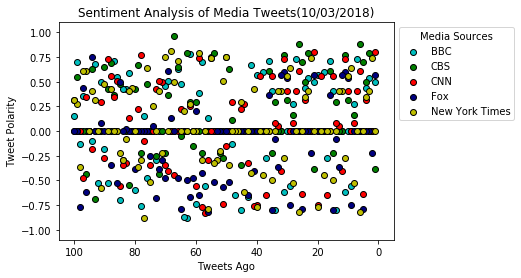

In [8]:
# Plotting Tweets ago vs compound score for each Media Source with scatter plot
plt.scatter(bbc["Tweets Ago"], bbc["Compound Score"], c='c', edgecolor='k', label='BBC')
plt.scatter(cbs["Tweets Ago"], cbs["Compound Score"], c='g', edgecolor='k', label='CBS')
plt.scatter(cnn["Tweets Ago"], cnn["Compound Score"], c='r', edgecolor='k', label='CNN')
plt.scatter(fox["Tweets Ago"], fox["Compound Score"], c='navy', edgecolor='k', label='Fox')
plt.scatter(nyt["Tweets Ago"], nyt["Compound Score"], c='y', edgecolor='k', label='New York Times')

#setting legend
legend = plt.legend(title = "Media Source", bbox_to_anchor=(1, 0.95))
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]
legend.legendHandles[3]._sizes = [25]
legend.legendHandles[4]._sizes = [25]

#setting chart characteristics
plt.title("Sentiment Analysis of Media Tweets(10/03/2018)")
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 1), title='Media Sources', fontsize='medium')

#saving figure
plt.savefig("Plots/TweetsagoVsCompoundscore.png", bbox_inches="tight")

plt.show()

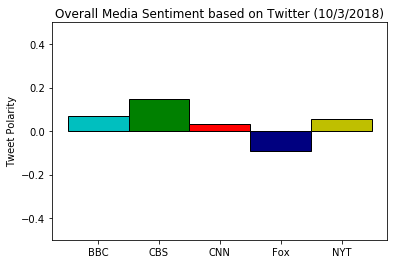

In [9]:
#plotting Tweet Polarity vs Overall Media Sentiment based on Twitter using bar chart
plt.bar(0, bbc['Compound Score'].mean(), color='c', edgecolor='k', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='g', edgecolor='k', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='k', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='k', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='k', width=1)

#Setting chart characteristics
plt.title("Overall Media Sentiment based on Twitter (10/3/2018)" )
plt.ylabel("Tweet Polarity")
plt.ylim(-0.5,0.5)

#setting ticks for bar chart
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
tick_locations = [value for value in np.arange(5)]
plt.xticks(tick_locations, x_labels)

#saving figure
plt.savefig("Plots/OverallMediaSentimentPlot.png", bbox_inches="tight")
plt.show()

Observable Trends:

1.All news outlets except Fox have a overall positive Vader Sentiment score as seen in the bar graph. That is kind of interesting. (What could Fox have been reporting that was so different from the other prominent news souces?)

2.All news outlets from the tweets pulled seem to have equal variance in tweet polarity. This is an inference drawn from the scatter plot as there are equal amount of scatter points for each media outlet on the positive and negative ends of tweet polarity.

3.In the scatter plot, there is a clump of data points around zero at similar timeframes for all media sources. This implies that the news reported during these times did not have an impact.